In [0]:
!pip install cirq

In [1]:
import cirq

In [2]:
# Using named qubits can be useful for abstract algorithms
# as well as algorithms not yet mapped onto hardware.
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4,5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)

In [3]:
print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


In [4]:
# Example gates
not_gate = cirq.CNOT
pauli_z = cirq.Z

# Using exponentiation to get square root gates
sqrt_x_gate = cirq.X**0.5
sqrt_iswap = cirq.ISWAP**0.5

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Example operations
q0, q1 = cirq.LineQubit.range(2)
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = sqrt_iswap(q0, q1)

In [5]:
circuit = cirq.Circuit()
# You can create a circuit by appending to it
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
# All of the gates are put into the same Moment since none overlap
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [6]:
# We can also create a circuit directly as well:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))

0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [7]:
# Creates each gate in a separate moment.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


In [8]:
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)
q2 = cirq.GridQubit(0, 2)
adjacent_op = cirq.CZ(q0, q1)
nonadjacent_op = cirq.CZ(q0, q2)

# This is an unconstrained circuit with no device
free_circuit = cirq.Circuit()
# Both operations are allowed:
free_circuit.append(adjacent_op)
free_circuit.append(nonadjacent_op)
print('Unconstrained device:')
print(free_circuit)
print()

# This is a circuit on the Foxtail device
# only adjacent operations are allowed.
print('Foxtail device:')
foxtail_circuit = cirq.Circuit(device=cirq.google.Foxtail)
foxtail_circuit.append(adjacent_op)
try:
  # Not allowed, will throw exception
  foxtail_circuit.append(nonadjacent_op)
except ValueError as e:
  print('Not allowed. %s' % e)

Unconstrained device:
(0, 0): ───@───@───
           │   │
(0, 1): ───@───┼───
               │
(0, 2): ───────@───

Foxtail device:
Not allowed. Non-local interaction: cirq.CZ(cirq.GridQubit(0, 0), cirq.GridQubit(0, 2)).


In [9]:
# Create a circuit to generate a Bell State:
# sqrt(2) * ( |00> + |11> )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0,q1))

# Initialize Simulator
s=cirq.Simulator()

print('Simulate the circuit:')
results=s.simulate(bell_circuit)
print(results)
print()

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

print('Sample the circuit:')
samples=s.run(bell_circuit, repetitions=1000)
# Print a histogram of results
print(samples.histogram(key='result'))

Simulate the circuit:
measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩

Sample the circuit:
Counter({0: 509, 3: 491})


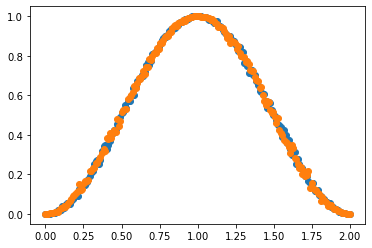

In [11]:
import matplotlib.pyplot as plt
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'),
                       cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t','p', data={'t': x_data, 'p': y_data})
plt.show()

In [12]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [15]:
print(cirq.Circuit(cirq.decompose(cirq.H(cirq.LineQubit(0)))))

0: ───Y^0.5───X───


In [14]:
q0, q1, q2 = cirq.LineQubit.range(3)
print(cirq.Circuit(cirq.decompose(cirq.TOFFOLI(q0, q1, q2))))

0: ───T────────────────@─────────────────────────────────@─────────────────────────────@────────────────────────────@───────────────────────────────────────
                       │                                 │                             │                            │
1: ───T───────Y^-0.5───@───Y^0.5────@───T^-1────Y^-0.5───@────────Y^0.5───@───Y^-0.5───@──────Y^0.5────@───Y^-0.5───@──────Y^0.5────@───────────────────────
                                    │                                     │                            │                            │
2: ───Y^0.5───X────────T───Y^-0.5───@───Y^0.5───T────────Y^-0.5───────────@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5────T^-1───Y^-0.5───@───Y^0.5───Y^0.5───X───


In [16]:
swap = cirq.SWAP(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1))
print(cirq.Circuit(swap, device=cirq.google.Foxtail))

(0, 0): ───S^-1───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───Z───
                           │                          │                   │
(0, 1): ───Z──────Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───S───


In [17]:
q=cirq.GridQubit(1, 1)
optimizer=cirq.MergeSingleQubitGates()
c=cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
optimizer.optimize_circuit(c)
print(c)

(1, 1): ───X^0.25───Y^0.25───T───
           ┌                           ┐
(1, 1): ───│ 0.5  +0.707j -0.   -0.5j  │───────────
           │ 0.354+0.354j  0.146+0.854j│
           └                           ┘
